<H1> Per Capita Saving Calculation Using DIfferential Privacy

In [24]:
# Read Excel file into a dataset
import pandas as pd

dataset = pd.read_excel('Input/PCSDistributed.xlsx')

# Display the dataset
dataset

,User,Day,Divided PCS
0,MAC000030,2013-01-01,12.925
1,MAC000030,2013-01-02,20.197
2,MAC000030,2013-01-03,12.745
3,MAC000030,2013-01-04,22.449
4,MAC000030,2013-01-05,21.201
...,...,...,...
8598,MAC005523,2013-06-26,9.143
8599,MAC005523,2013-06-27,8.907
8600,MAC005523,2013-06-28,7.141
8601,MAC005523,2013-06-29,7.784


In [25]:
#Tranpose Dataset to get users distibuted PCS 
transposed_dataset = dataset.pivot(index='User', columns='Day', values='Divided PCS')
# transposed_dataset.columns = transposed_dataset.columns.strftime('%Y-%m-%d')
# transposed_dataset = transposed_dataset.reset_index().rename_axis(None, axis=1)
transposed_dataset= transposed_dataset.fillna(0)
transposed_dataset.head()

Day,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-06-21,2013-06-22,2013-06-23,2013-06-24,2013-06-25,2013-06-26,2013-06-27,2013-06-28,2013-06-29,2013-06-30
User,,,,,,,,,,,,,,,,,,,,,
MAC000030,12.925,20.197,12.745,22.449,21.201,34.773,21.215,8.926,8.424,15.749,...,10.139,12.857,22.002,16.044,6.276,6.766,6.833,6.553,8.704,14.668
MAC000040,41.776,39.831,34.204,35.075,27.713,31.298,32.613,29.181,25.470,34.583,...,24.096,24.755,28.085,32.813,33.324,29.271,32.943,30.232,30.930,26.727
MAC000103,35.028,35.630,32.124,33.779,34.206,45.536,32.820,31.241,32.231,32.672,...,15.668,21.321,16.930,19.118,22.783,17.341,21.047,14.185,14.105,22.587
MAC000110,18.822,15.225,17.599,20.181,22.289,19.334,16.782,13.153,18.557,14.240,...,14.491,17.246,19.140,10.378,11.820,11.849,14.438,13.702,12.774,13.233
MAC000112,28.895,18.244,14.463,12.008,18.307,21.282,16.054,13.542,17.371,12.496,...,12.522,11.836,19.668,9.727,9.678,9.188,15.344,8.643,10.282,12.069


In [26]:
#Calculate the number of people participated
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import laplace
inputs=dataset['Day']#transposed_dataset['2014-02-01']
N=transposed_dataset.shape[0] #len(inputs)
print("N",N)
# variance =transposed_dataset.iloc[:, 0].var()#inputs.var()# np.var(inputs)
# print("variance:",variance)

# b=math.sqrt(variance/(2*N))   #b is scale
# b

N 48


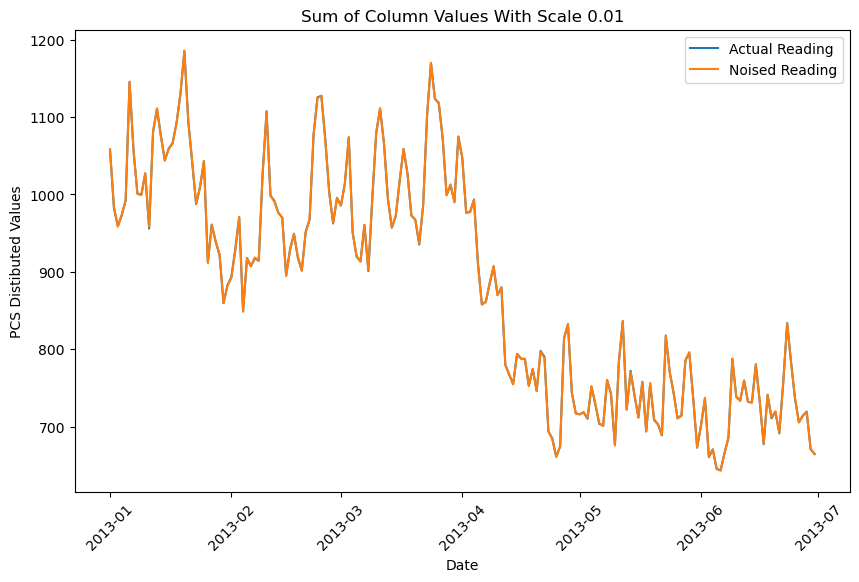

<Figure size 640x480 with 0 Axes>

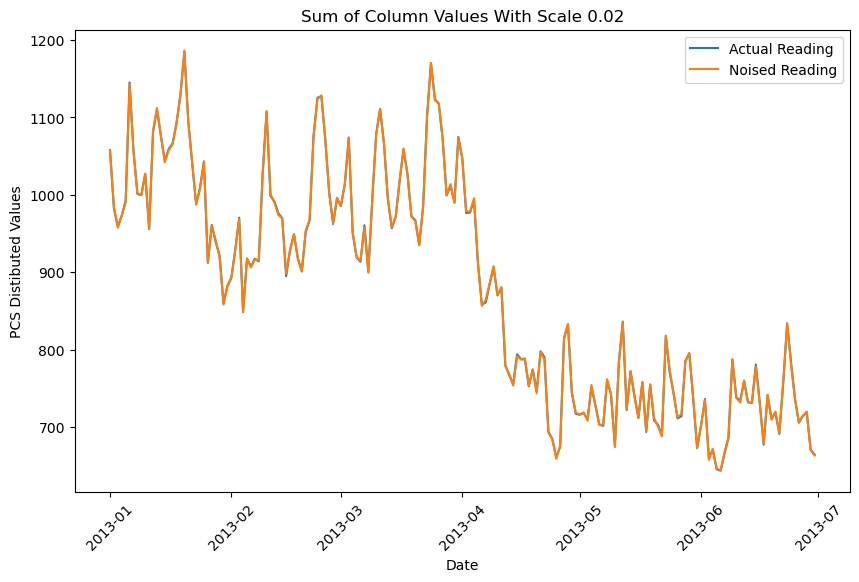

<Figure size 640x480 with 0 Axes>

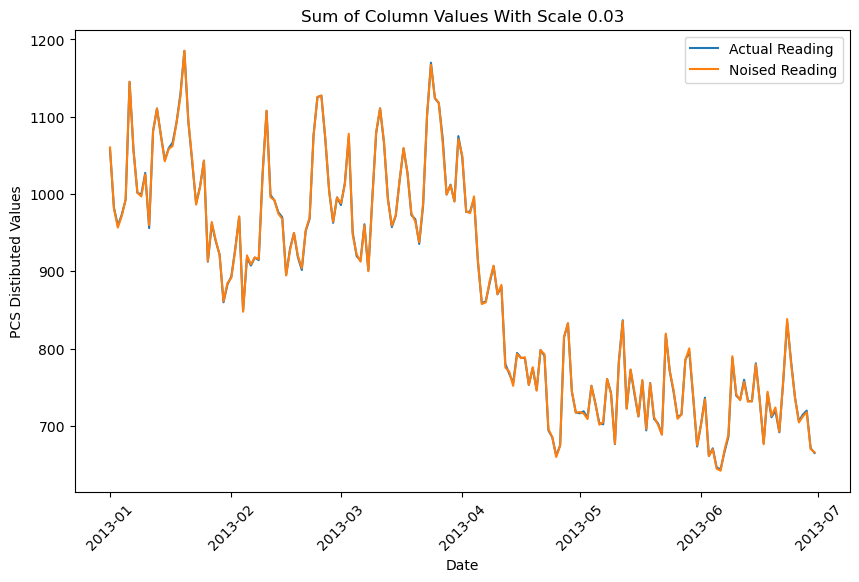

<Figure size 640x480 with 0 Axes>

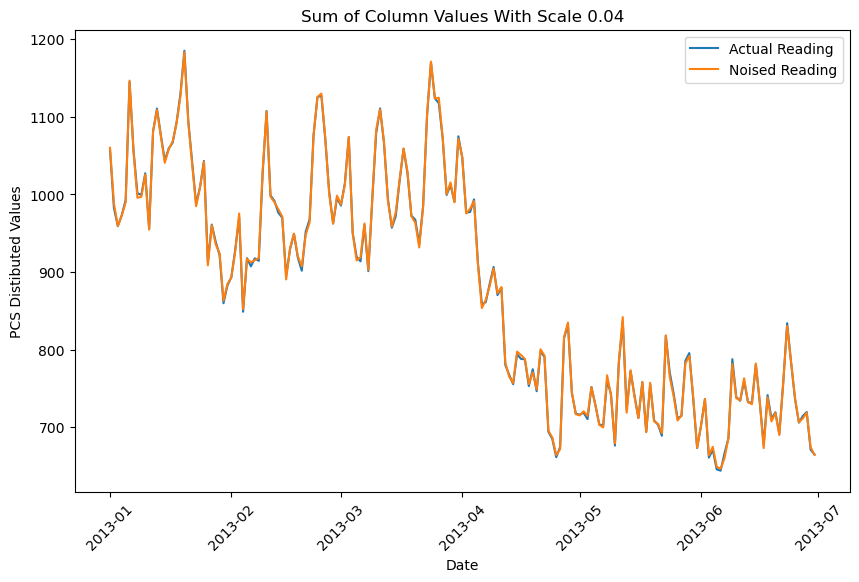

<Figure size 640x480 with 0 Axes>

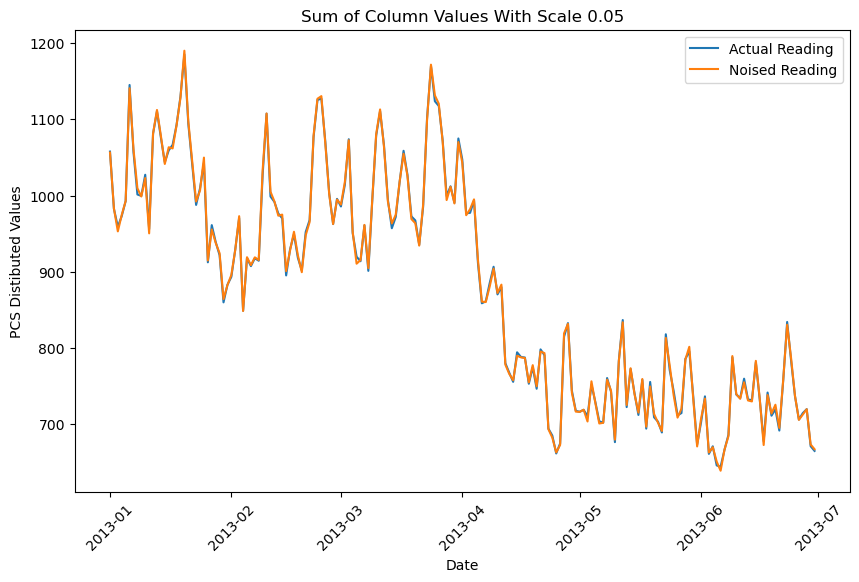

<Figure size 640x480 with 0 Axes>

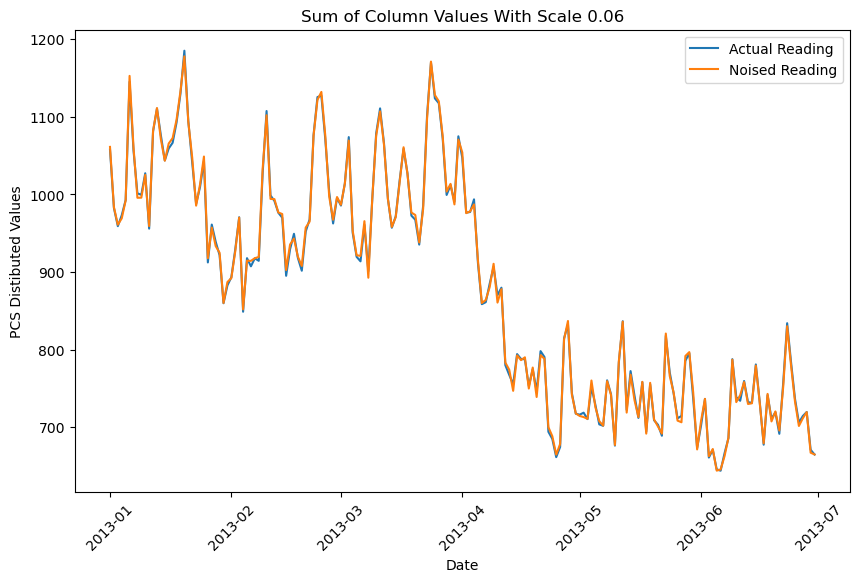

<Figure size 640x480 with 0 Axes>

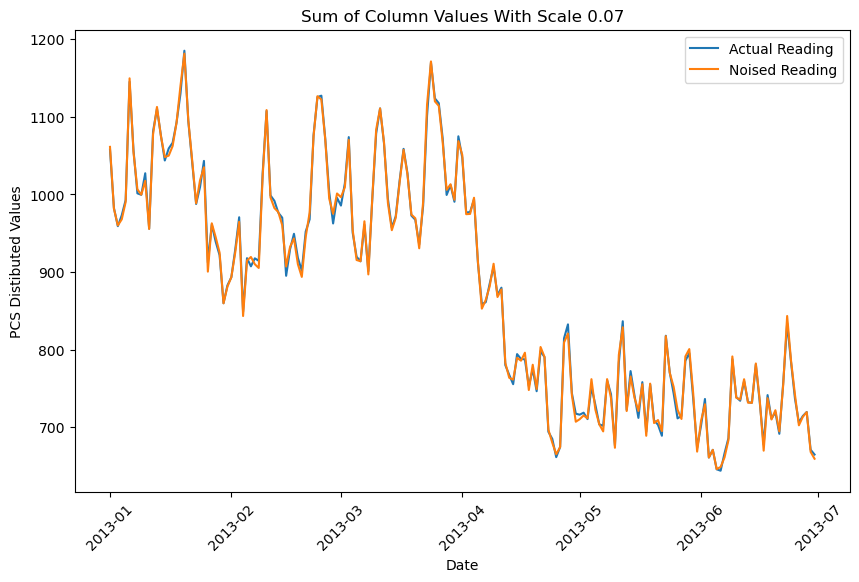

<Figure size 640x480 with 0 Axes>

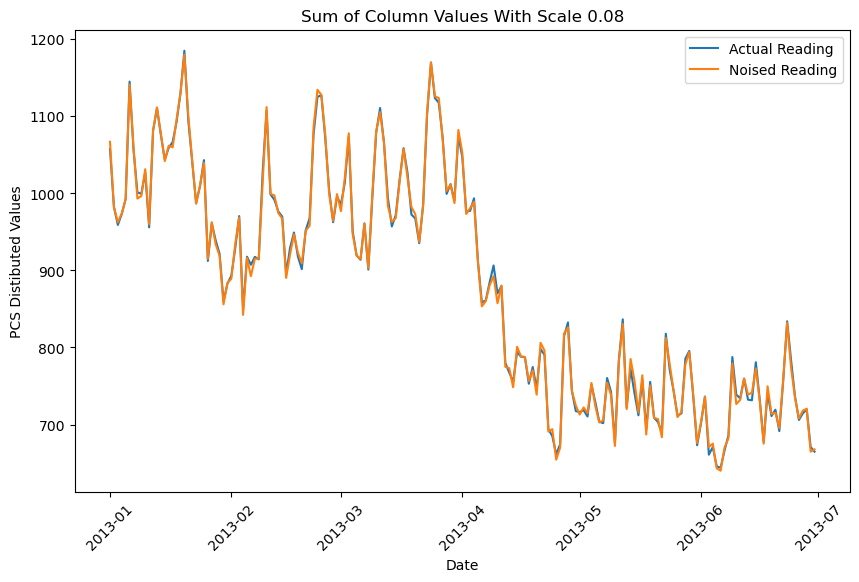

<Figure size 640x480 with 0 Axes>

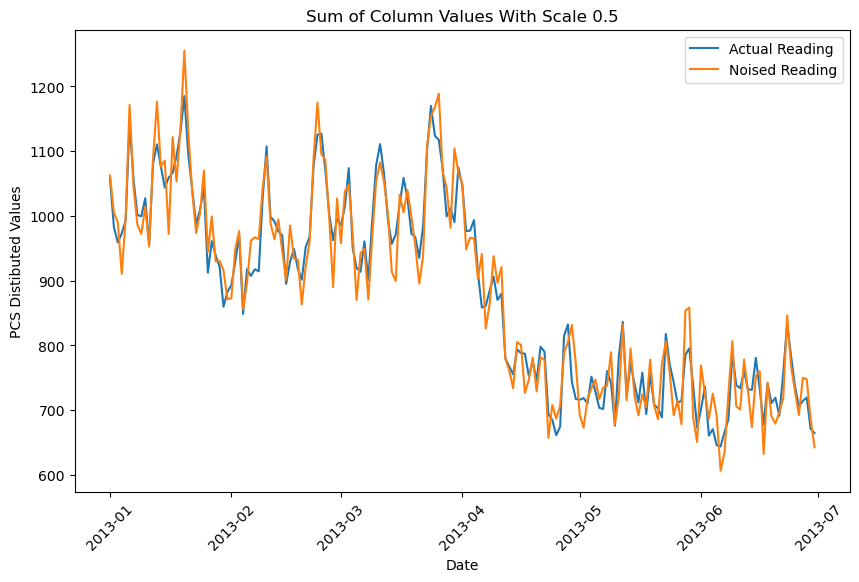

<Figure size 640x480 with 0 Axes>

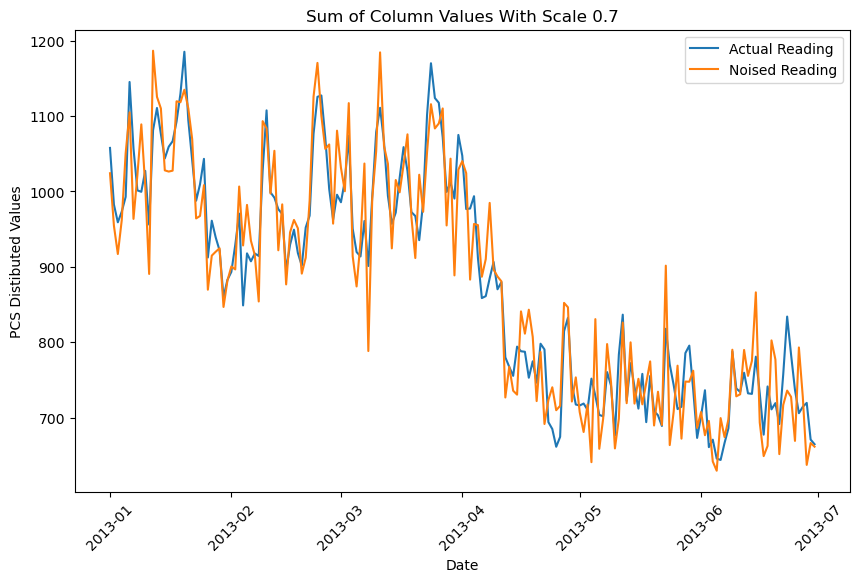

<Figure size 640x480 with 0 Axes>

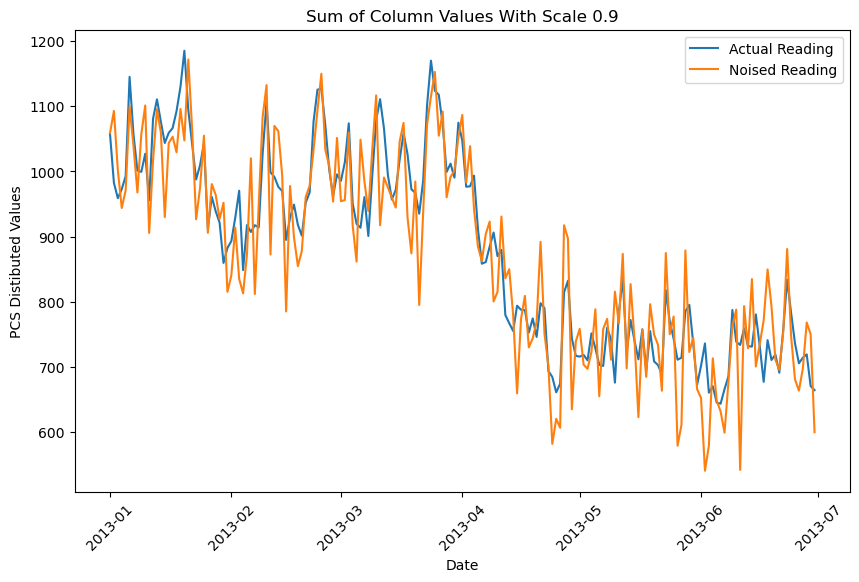

<Figure size 640x480 with 0 Axes>

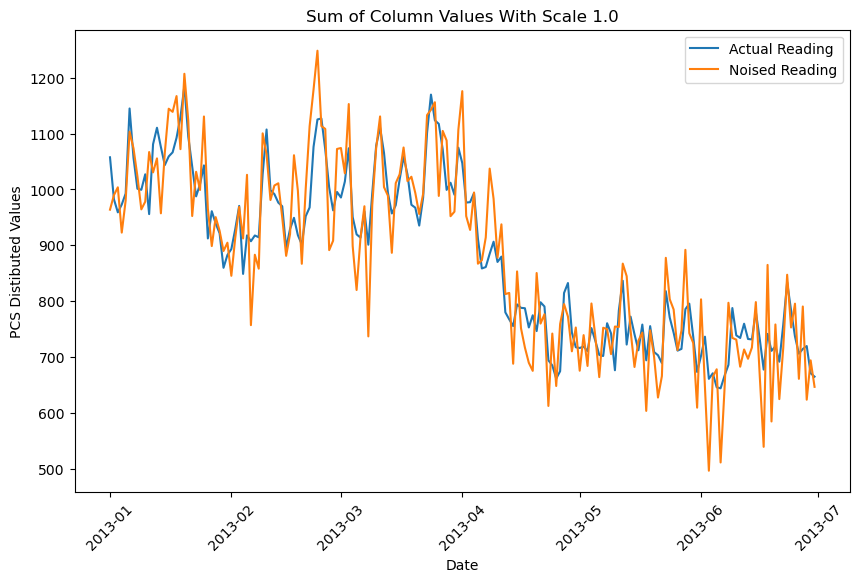

<Figure size 640x480 with 0 Axes>

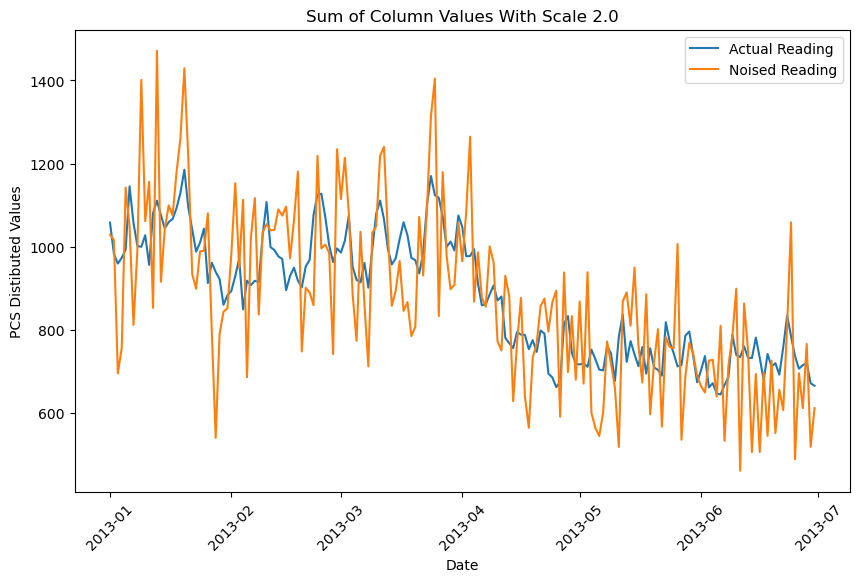

<Figure size 640x480 with 0 Axes>

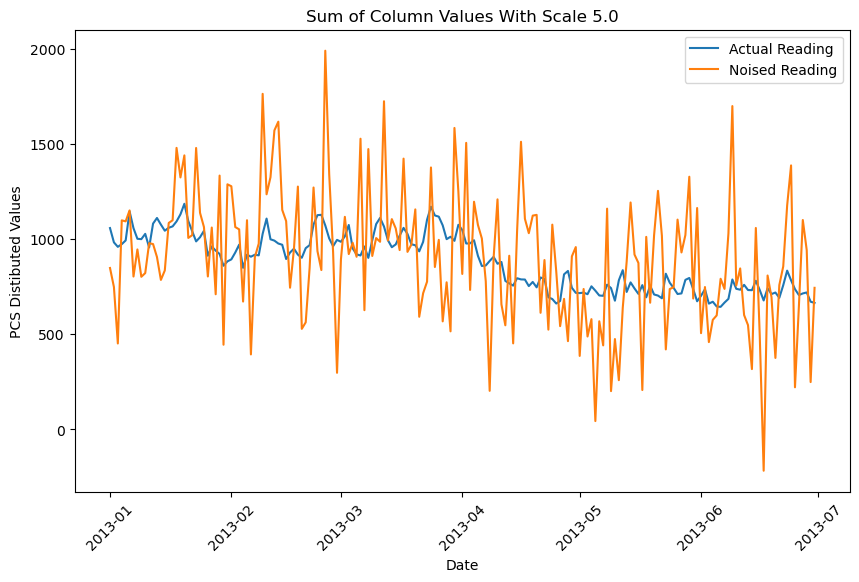

<Figure size 640x480 with 0 Axes>

In [27]:
# Calculating optimal scale b value
scale_values =[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.5,0.7,0.9, 1.0, 2.0, 5.0]# [0.1, 0.5, 1.0, 2.0, 5.0]
column_sums = transposed_dataset.sum()#/1000
for scalevalue in scale_values:
    #transposed_dataset_noise=null
    transposed_dataset_noise=transposed_dataset.copy()
    # Iterate through each cell in the transposed dataset
    for column in transposed_dataset_noise:
        for index in transposed_dataset_noise.index:
            # Add gamma noise to the cell value
            transposed_dataset_noise.loc[index, column] +=np.random.gamma(shape=N, scale=scalevalue)-np.random.gamma(shape=N, scale=scalevalue) #np.random.gamma(shape=0.5, scale=b)#, size=43)# np.random.gamma(shape=N, scale=b)
    # Calculate the sum of column values

    column_sums_noised = transposed_dataset_noise.sum()#/1000
    fig = plt.figure(figsize=(10, 6))
    #print(column_sums.values)

    # Create a line chart
    plt.plot(column_sums.index, column_sums.values, label='Actual Reading')
    plt.plot(column_sums_noised.index, column_sums_noised.values, label='Noised Reading')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('PCS Distibuted Values')
    plt.title('Sum of Column Values With Scale '+str(scalevalue))

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Display the chart
    plt.show()
    plt.clf()

<B> Reasonbale SCale value is 0.5

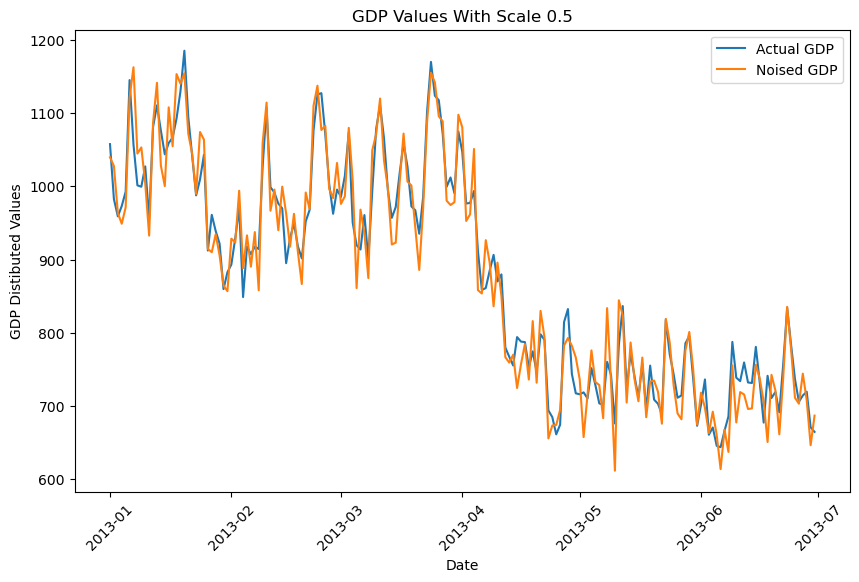

<Figure size 640x480 with 0 Axes>

In [28]:
#Use the optimal Scale value and find the gamma noise
scale_values =[ 0.5 ]# 0.05
column_sums = transposed_dataset.sum()#/1000
for scalevalue in scale_values:
    #transposed_dataset_noise=null
    transposed_dataset_noise=transposed_dataset.copy()
    # Iterate through each cell in the transposed dataset
    for column in transposed_dataset_noise:
        for index in transposed_dataset_noise.index:
            # Add gamma noise to the cell value
            transposed_dataset_noise.loc[index, column] +=np.random.gamma(shape=N, scale=scalevalue)-np.random.gamma(shape=N, scale=scalevalue) #np.random.gamma(shape=0.5, scale=b)#, size=43)# np.random.gamma(shape=N, scale=b)
    #print(transposed_dataset.head())
    # Calculate the sum of column values

    column_sums_noised = transposed_dataset_noise.sum()#/1000
    fig = plt.figure(figsize=(10, 6))
    #print(column_sums.values)

    # Create a line chart
    plt.plot(column_sums.index, column_sums.values, label='Actual GDP')
    plt.plot(column_sums_noised.index, column_sums_noised.values, label='Noised GDP')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('GDP Distibuted Values')
    plt.title('GDP Values With Scale '+str(scalevalue))

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Display the chart
    plt.show()
    plt.clf()

In [29]:
#Final Per Capita Saving
print("Actual GDP :",format(sum(column_sums), '.3f'))
print("Differential GDP :",format(sum(column_sums_noised), '.3f'))
print("Difference :",format(abs(sum(column_sums)-sum(column_sums_noised)), '.3f'))
diffferencePercentage=format(abs((sum(column_sums)-sum(column_sums_noised)))*100/sum(column_sums), '.3f')
print("Difference Percentage:",str(diffferencePercentage)+"%")


Actual GDP : 159310.001
Differential GDP : 158923.714
Difference : 386.287
Difference Percentage: 0.242%


<H1> Per Capita Saving Calculation Using DIfferential Privacy With Self Healed Noises

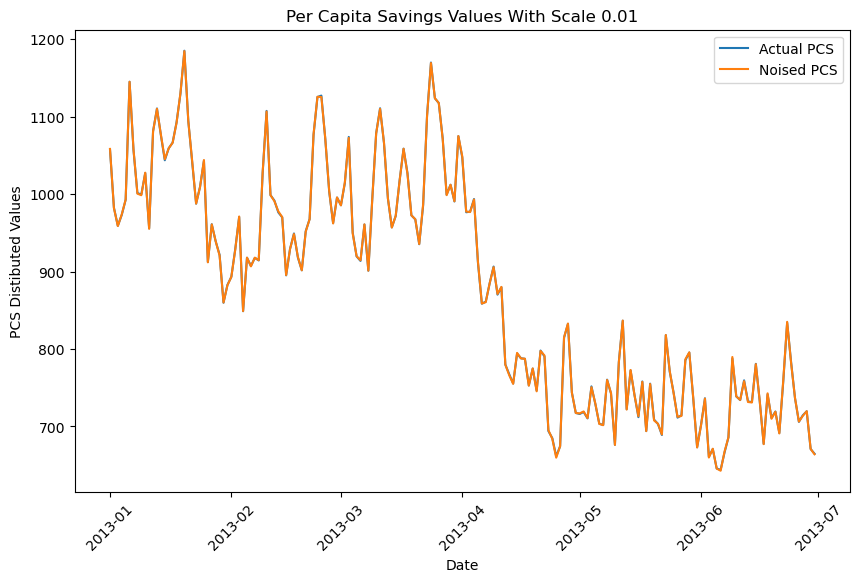

<Figure size 640x480 with 0 Axes>

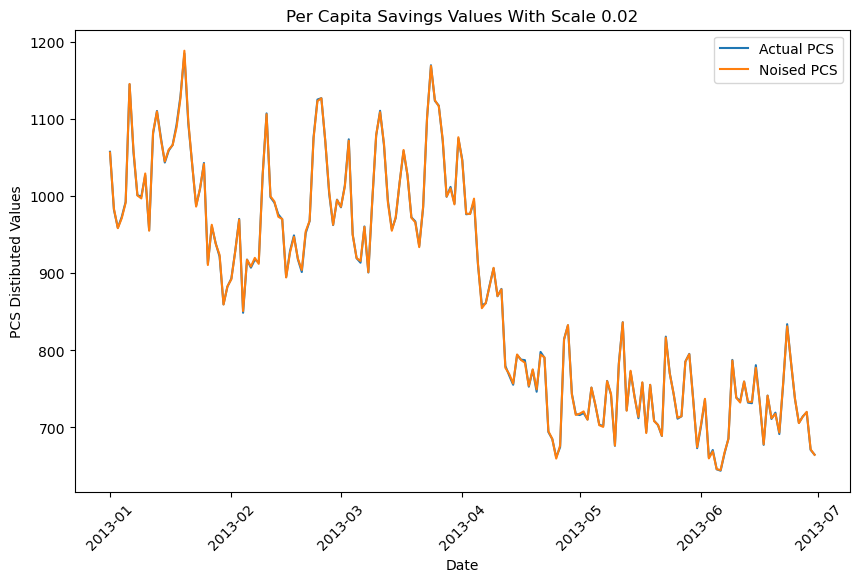

<Figure size 640x480 with 0 Axes>

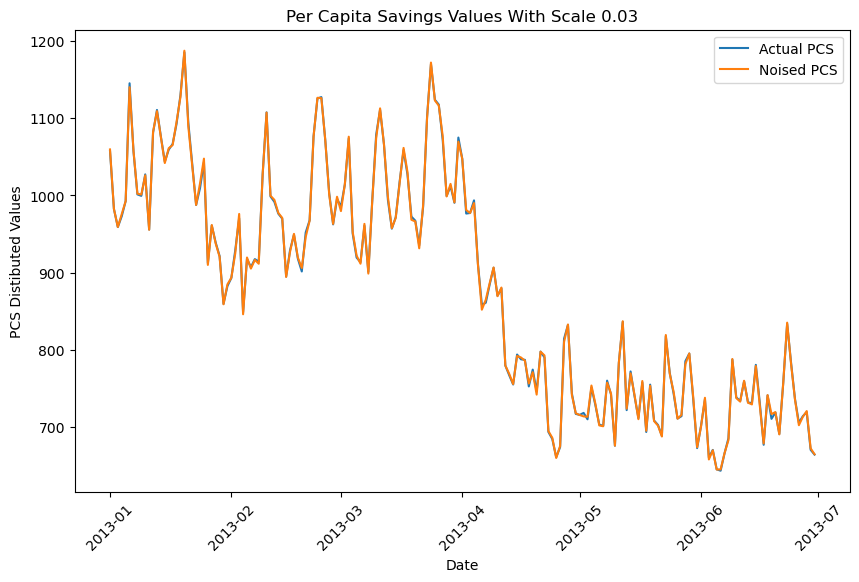

<Figure size 640x480 with 0 Axes>

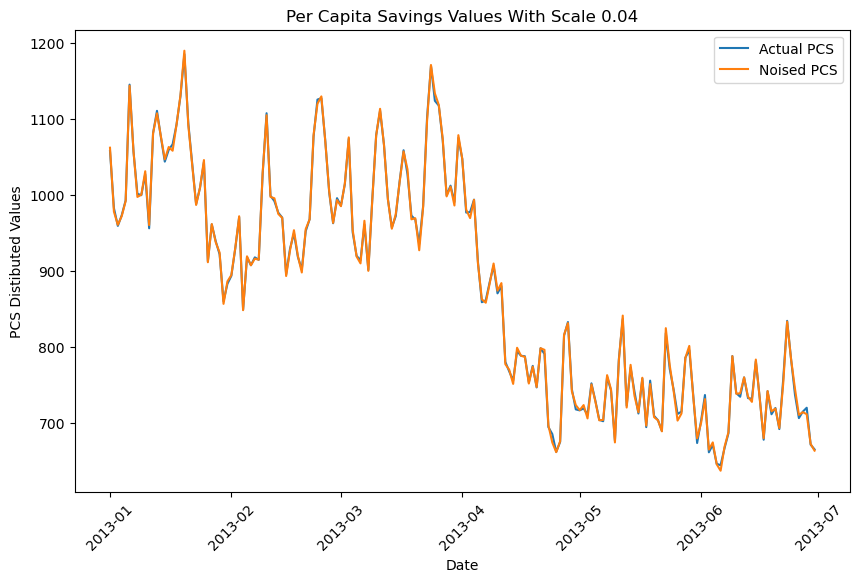

<Figure size 640x480 with 0 Axes>

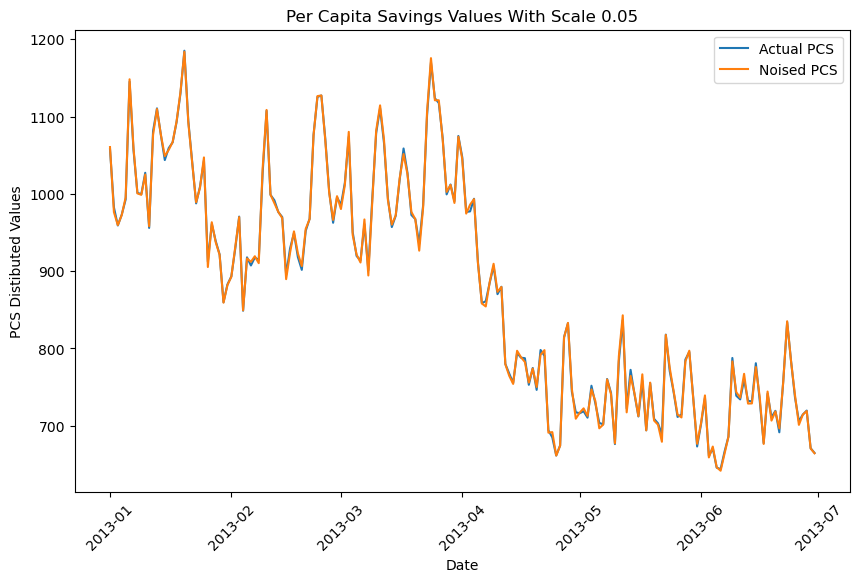

<Figure size 640x480 with 0 Axes>

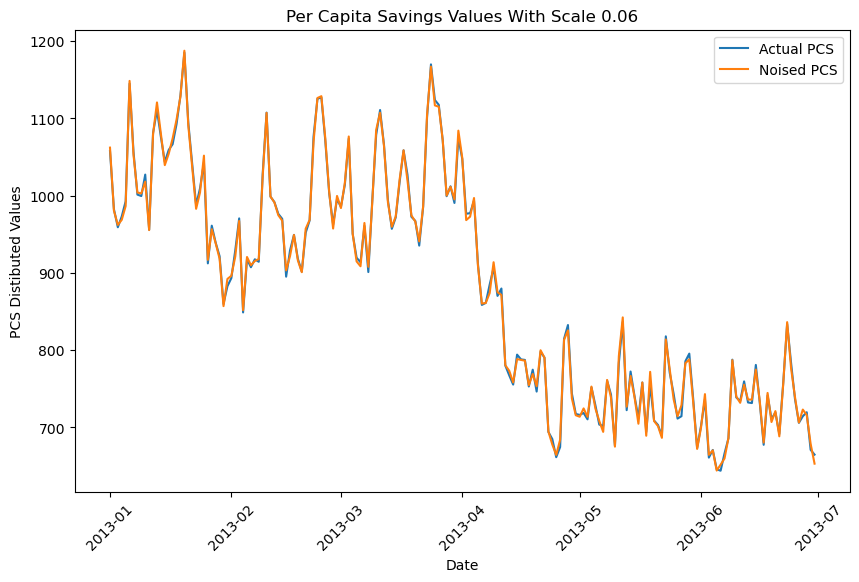

<Figure size 640x480 with 0 Axes>

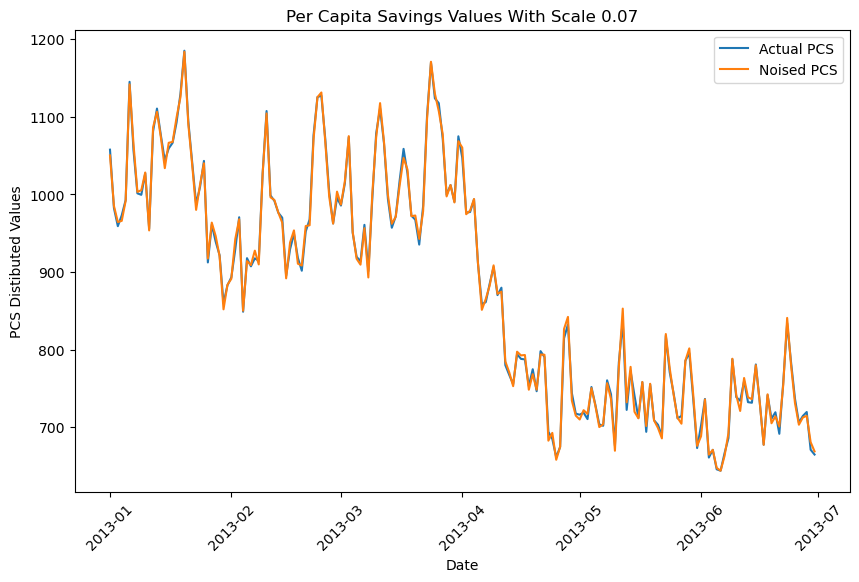

<Figure size 640x480 with 0 Axes>

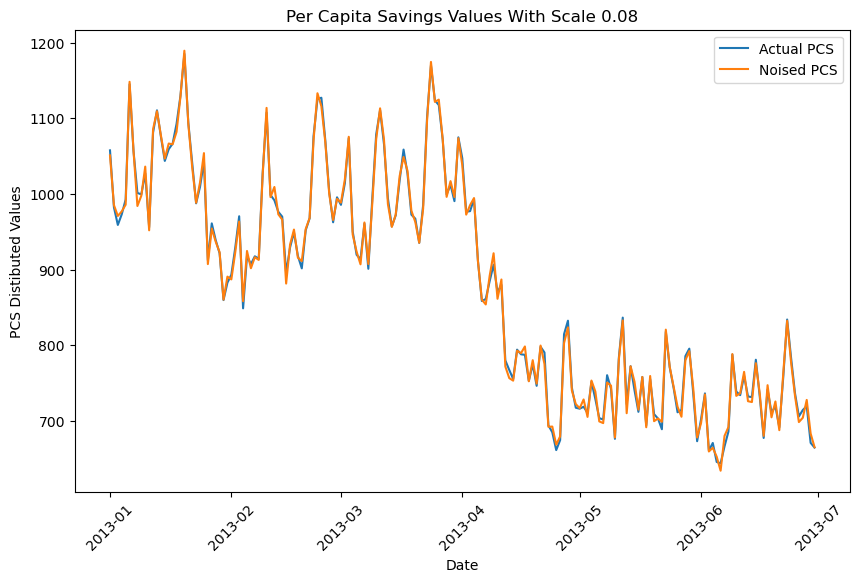

<Figure size 640x480 with 0 Axes>

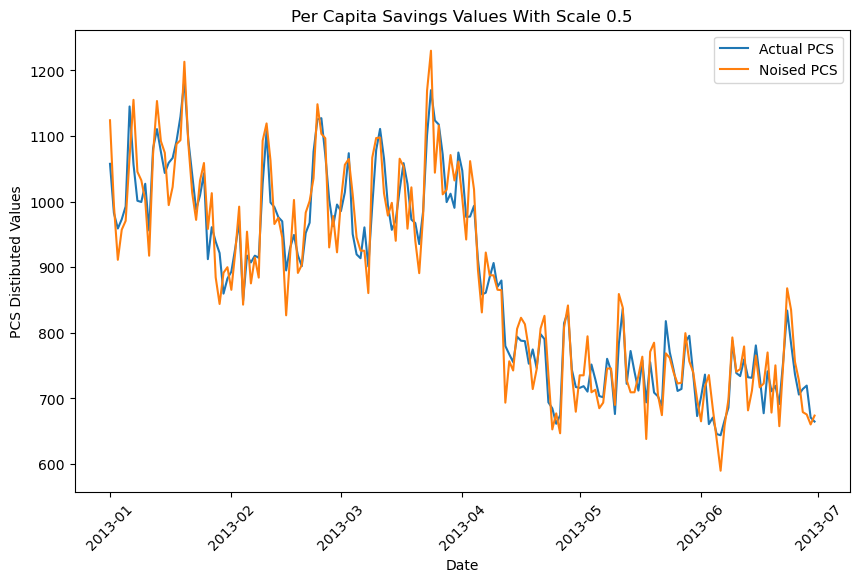

<Figure size 640x480 with 0 Axes>

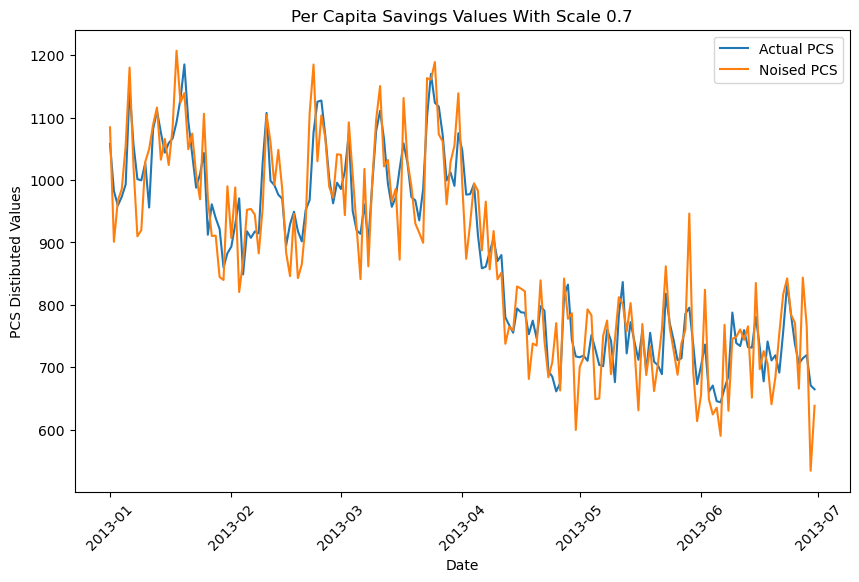

<Figure size 640x480 with 0 Axes>

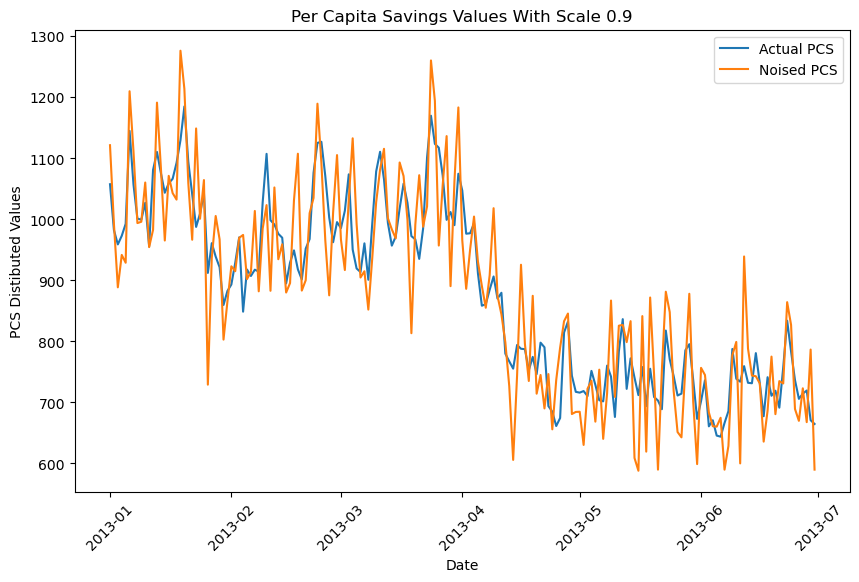

<Figure size 640x480 with 0 Axes>

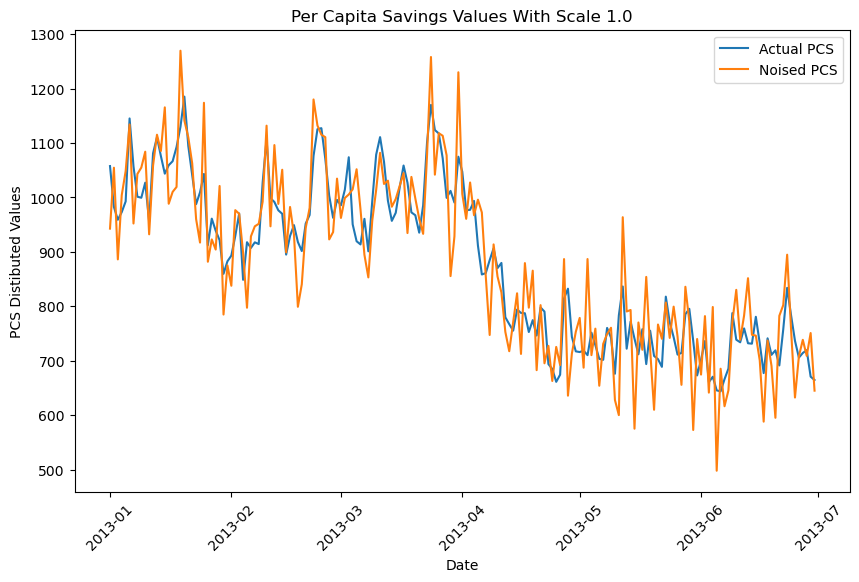

<Figure size 640x480 with 0 Axes>

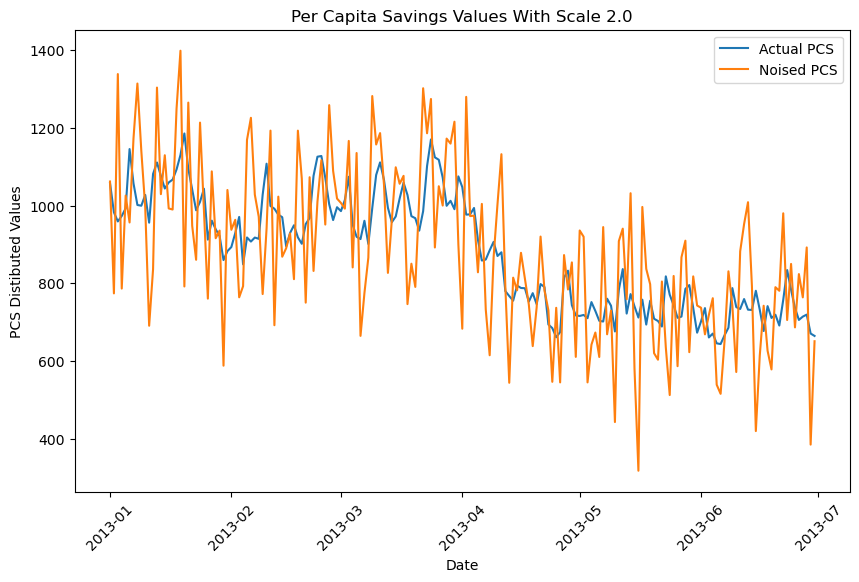

<Figure size 640x480 with 0 Axes>

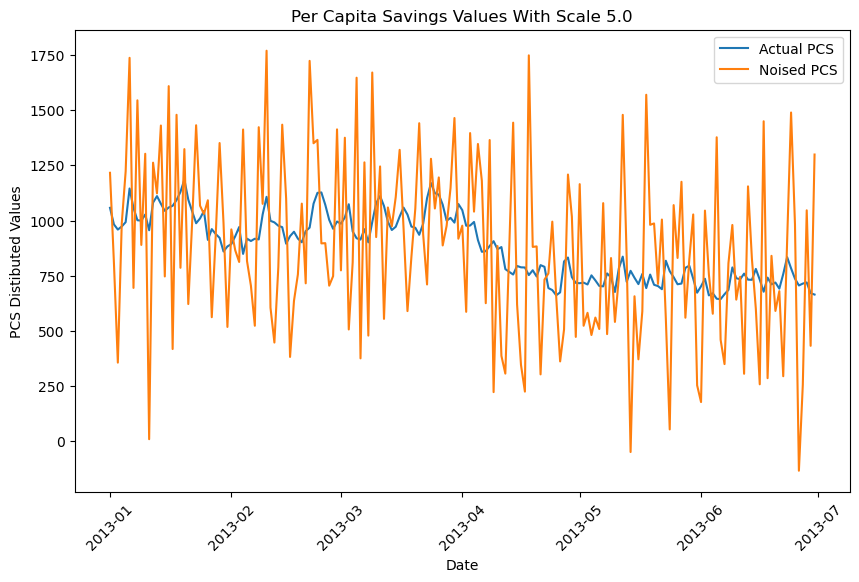

<Figure size 640x480 with 0 Axes>

In [30]:
#Use the optimal Scale value and find the gamma noise
scale_values =[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.5,0.7,0.9, 1.0, 2.0, 5.0]# 0.05
column_sums = transposed_dataset.sum()#/1000
for scalevalue in scale_values:
    #transposed_dataset_noise=null
    transposed_dataset_noise=transposed_dataset.copy()
    # Iterate through each cell in the transposed dataset
    for column in transposed_dataset_noise:
        for index in transposed_dataset_noise.index:
            # Add gamma noise to the cell value
            transposed_dataset_noise.loc[index, column] =np.random.gamma(shape=N, scale=scalevalue)-np.random.gamma(shape=N, scale=scalevalue) #np.random.gamma(shape=0.5, scale=b)#, size=43)# np.random.gamma(shape=N, scale=b)
    #print(transposed_dataset.head())
    # Calculate the sum of column values
    
    transposed_dataset_noise_Corrected=transposed_dataset_noise.copy()
    for index in transposed_dataset_noise.index:
        val1=0
        val2=0
        val3=0
        for colIndex,column in enumerate(transposed_dataset_noise.columns):
            #print(index,colIndex,column )
            meanVal=(val1+val2+val3)/3

            if colIndex == len(transposed_dataset_noise.columns) - 1:
                # Current column is the last column
                #print(f"Last column: {column}")
                transposed_dataset_noise_Corrected.loc[index, column]=0-(val1+(val2*2/3)+(val3/3))#dataset_first_10.loc[index, column]-(val1+(val2*2/3)+(val3/3))
            else :
                transposed_dataset_noise_Corrected.loc[index, column]=transposed_dataset_noise.loc[index, column]-meanVal
            val3=val2
            val2=val1
            val1=transposed_dataset_noise.loc[index, column]
    
    
    
    for column in transposed_dataset_noise:
        for index in transposed_dataset_noise.index:
            # Add gamma noise to the cell value
            #transposed_dataset_noise.loc[index, column] =transposed_dataset.loc[index, column]+ transposed_dataset_noise.loc[index, column]+transposed_dataset_noise_Corrected.loc[index, column]
            transposed_dataset_noise.loc[index, column] =transposed_dataset.loc[index, column]+  transposed_dataset_noise_Corrected.loc[index, column]
            column_sums_noised = transposed_dataset_noise.sum()#/1000
    fig = plt.figure(figsize=(10, 6))
    #print(column_sums.values)

    # Create a line chart
    plt.plot(column_sums.index, column_sums.values, label='Actual PCS')
    plt.plot(column_sums_noised.index, column_sums_noised.values, label='Noised PCS')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('PCS Distibuted Values')
    plt.title('Per Capita Savings Values With Scale '+str(scalevalue))

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Display the chart
    plt.show()
    plt.clf()

<B> Reasonbale SCale value is 0.5

In [31]:
#Using optimal Scale value of 0.5 to collect self-healed noise
scale_values =[ 0.5 ]# 0.05
column_sums = transposed_dataset.sum()#/1000
for scalevalue in scale_values:
    transposed_dataset_noise=transposed_dataset.copy()
    # Iterate through each cell in the transposed dataset
    for column in transposed_dataset_noise:
        for index in transposed_dataset_noise.index:
            # Add gamma noise to the cell value
            transposed_dataset_noise.loc[index, column] =np.random.gamma(shape=N, scale=scalevalue)-np.random.gamma(shape=N, scale=scalevalue) #np.random.gamma(shape=0.5, scale=b)#, size=43)# np.random.gamma(shape=N, scale=b)
    
    #Preparing self-healed noise from gamma noise
    transposed_dataset_noise_Corrected=transposed_dataset_noise.copy()
    for index in transposed_dataset_noise.index:
        val1=0
        val2=0
        val3=0
        for colIndex,column in enumerate(transposed_dataset_noise.columns):
            meanVal=(val1+val2+val3)/3

            if colIndex == len(transposed_dataset_noise.columns) - 1:
                # Calculation for last column noise
                transposed_dataset_noise_Corrected.loc[index, column]=0-(val1+(val2*2/3)+(val3/3))#dataset_first_10.loc[index, column]-(val1+(val2*2/3)+(val3/3))
            else :
                transposed_dataset_noise_Corrected.loc[index, column]=transposed_dataset_noise.loc[index, column]-meanVal
            val3=val2
            val2=val1
            val1=transposed_dataset_noise.loc[index, column]

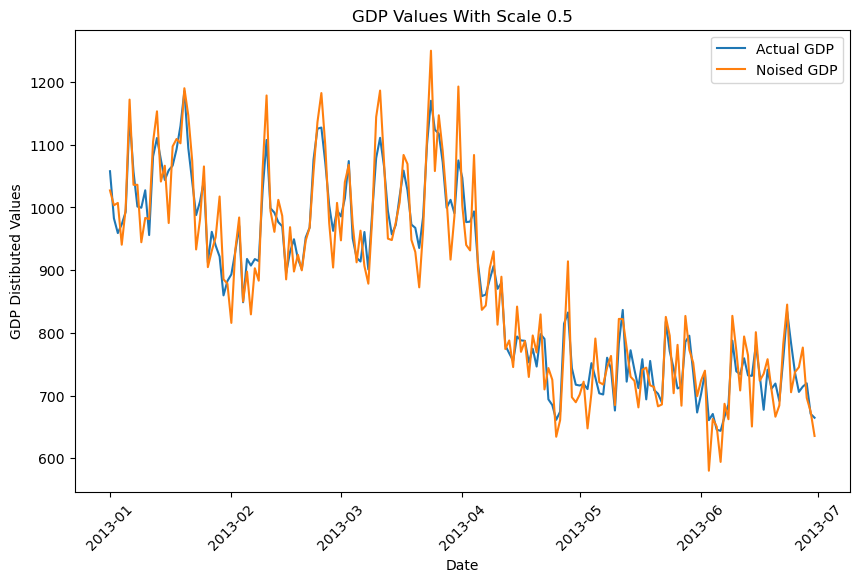

<Figure size 640x480 with 0 Axes>

In [32]:
#Apply self-healed noise to actual values
for column in transposed_dataset_noise:
    for index in transposed_dataset_noise.index:
        # Add self-healed gamma noise to the cell value
        transposed_dataset_noise.loc[index, column] =transposed_dataset.loc[index, column]+  transposed_dataset_noise_Corrected.loc[index, column]
        column_sums_noised = transposed_dataset_noise.sum()
fig = plt.figure(figsize=(10, 6))

# Create a line chart
plt.plot(column_sums.index, column_sums.values, label='Actual GDP')
plt.plot(column_sums_noised.index, column_sums_noised.values, label='Noised GDP')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('GDP Distibuted Values')
plt.title('GDP Values With Scale '+str(scalevalue))

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the chart
plt.show()
plt.clf()

In [33]:
#Final Per Capita Saving
print("Actual GDP :",format(sum(column_sums), '.3f'))
print("Differential GDP :",format(sum(column_sums_noised), '.3f'))
print("Difference :",format(abs(sum(column_sums)-sum(column_sums_noised)), '.3f'))
diffferencePercentage=format(abs((sum(column_sums)-sum(column_sums_noised)))*100/sum(column_sums), '.3f')
print("Difference Percentage:",str(diffferencePercentage)+"%")

Actual GDP : 159310.001
Differential GDP : 159310.001
Difference : 0.000
Difference Percentage: 0.000%


<B> With Self-Healed noise addition, privacy is preserved with zero data loss